# 1st Assignment-- Moamin Abdulkareem

## Problem 1.4 Page 35
- We use an artificial data set to study the perceptron learning algorithm . This problem leads you to explore the algorithm further with data sets of different sizes a n d dimensions


In [99]:
# First we have to import some packages
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')


- Generate a linearly separable data set of size 20. Plot the examples {($x_n$ , $Y_n$)} as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.
- Run the perceptron learning algorithm on the data set a bove. Report the number of updates that the algorithm takes before converging. Plot the examples { ($x_n$, $Y_n$) } , the target function $f$, and the final hypothesis $g$ in the same figure. Comment on whether $f$ is close to $g$.

In [100]:
class perceptron:

    def __init__(self, **kwargs):

        self.n = kwargs.get('n', None)
        self.max_iteration = kwargs.get('max_iteration', None)
        self.stop = kwargs.get('stop', None)

        xa, ya, xb, yb = [random.uniform(-1, 1) for i in range(4)]

        self.w = np.array([xb * ya - xa * yb, yb - ya, xa - xb])

        self.datapoints = self.generate_pionts(num=self.n)

    def generate_pionts(self, num):

        X = list()
        for i in range(num):
            x1, x2 = [random.uniform(-1, 1) for i in range(2)]
            x = np.array([1, x1, x2])
            s = int(np.sign(self.w.T.dot(x)))
            X.append((x, s))

        return X


    def pla(self):

        y = list()
        x = list()

        for i in range(len(self.datapoints)):
            y.append(self.datapoints[i][1])
            x.append(self.datapoints[i][0])
        x = np.asarray(x)

        X = x[:, 1:]
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)
        clf = Perceptron(max_iter=self.max_iteration, tol=self.stop, fit_intercept=False)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_test)

        score = np.mean(y_pred == Y_test) * 100
        weights = clf.coef_

        intercept = clf.intercept_
        wh = [intercept[0], weights[0][0], weights[0][1]]

        print("The coefficients of the target function: ", self.w)
        print("Accuracy score on the test set: ", np.mean(y_pred == Y_test) * 100)

        print("The coefficients after applying perceptron from sklearn: ",wh)
        print("The total number of iterations until the convergence: ", clf.n_iter_)
        plt.figure(figsize=(10, 6))
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        a, b = -self.w[1] / self.w[2], -self.w[0] / self.w[2]
        u, t = -wh[1] / wh[2], -wh[0] / wh[2]
        l = np.linspace(-1, 1)
        plt.plot(l, a * l + b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x, s in self.datapoints:
            plt.plot(x[1], x[2], cols[s] + 'o')
        plt.plot(l, u * l + t, color='g')
        plt.show()
    def main(self):

        
        perceptron.pla(self)


The coefficients of the target function:  [-0.32734721 -0.03193297  1.49746351]
Accuracy score on the test set:  50.0
The coefficients after applying perceptron from sklearn:  [0.0, -0.5494646400390741, 0.9114672270023181]
The total number of iterations until the convergence:  3


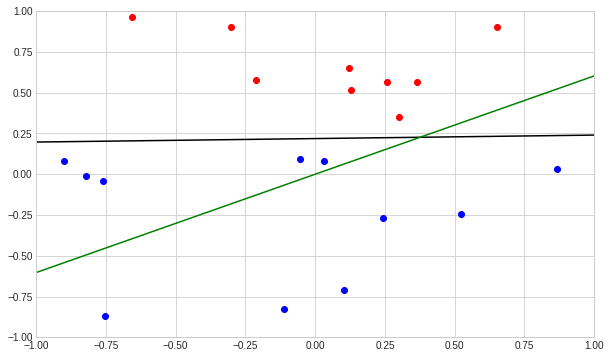

In [101]:
p1 = perceptron(n=20, max_iteration=1000, stop=0.0001)
p1.main()

### Repeat everything in (b) with another randomly generated data set of size 20.  Compare you're results with (b) .

The coefficients of the target function:  [0.03263235 0.71459431 1.16518929]
Accuracy score on the test set:  87.5
The coefficients after applying perceptron from sklearn:  [0.0, 0.7379321825447227, 0.8892847471855914]
The total number of iterations until the convergence:  3


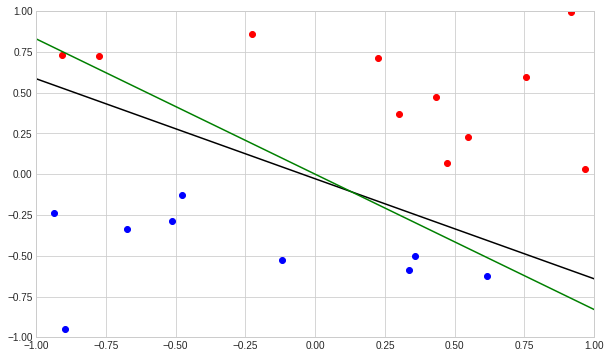

In [103]:
p2 = perceptron(n=20, max_iteration=1000, stop=0.0001)
p2.main()

### Repeat everything in (b) with a nother randomly generated data set of size 100. Compare you're results with (b).

The coefficients of the target function:  [-0.07810832 -0.26966472  0.84054109]
Accuracy score on the test set:  90.0
The coefficients after applying perceptron from sklearn:  [0.0, -0.6422658423217427, 1.8201338526608393]
The total number of iterations until the convergence:  3


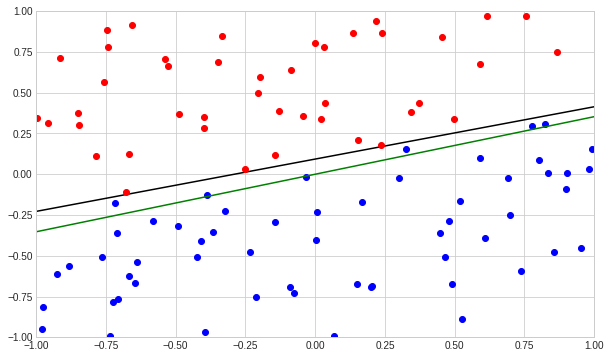

In [104]:
p3 = perceptron(n=100, max_iteration=1000, stop=0.0001)
p3.main()

### Repeat everything in (b) with another randomly generated data set of size 1, 000. Compare you're results with (b) .

The coefficients of the target function:  [ 0.10577984 -1.13394849 -0.28757821]
Accuracy score on the test set:  95.5
The coefficients after applying perceptron from sklearn:  [0.0, -2.489224571011836, -0.6138461336312424]
The total number of iterations until the convergence:  2


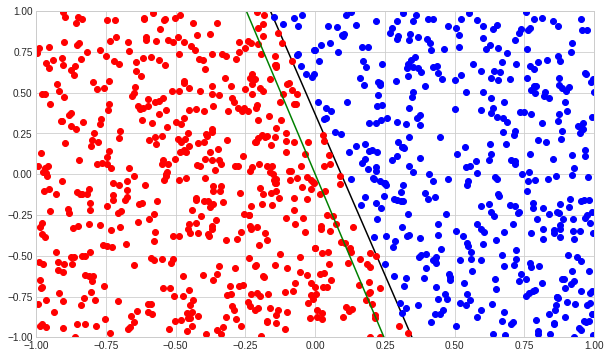

In [128]:
p4 = perceptron(n=1000, max_iteration=1000, stop=0.00001)
p4.main()

### Modify the algorithm such that it takes $X_n$ $\in$ $\mathbb{R}^{10}$ instead of $\mathbb{R}^2$ . Randomly generate a linearly separable data set of size 1, 000 with $X_n$ $\in$ $\mathbb{R}^{10}$ and feed the dataset to the a lgorithm. How many updates does the algorithm take to converge?

In [98]:


def generate_pionts2(num):

    X = list()
    y = list()
    # number of features is 10
    
    weights2 = np.array([random.uniform(-1,1) for i in range(11)])
    
    # Taking the transpose of the weights vector so we can apply that in the dot product
    wt = weights2.T
    for i in range(num):
        x = [random.uniform(-1, 1) for i in range(10)]
        X.append(x)
    X = np.asarray(X)
    # Adding the intercept
    weights2 = [random.uniform(-1,1) for i in range(10)]
    
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))
    for i in range(len(X)):
        s = int(np.sign(wt.dot(X[i])))
        y.append(s)
        
    return X, y

points,  target = generate_pionts2(1000)
X_train,X_test, Y_train,Y_test = train_test_split(points,target,test_size=0.4)

clf2 = Perceptron(max_iter=1000, tol=0.00001, fit_intercept=False)
clf2.fit(X_train,Y_train)
y_pred = clf2.predict(X_test)
print("The number of iterations until convergence: ", clf2.n_iter_)
print("Accuracy on the test set: ",np.mean(Y_test==y_pred)*100)




The number of iterations until convergence:  5
Accuracy on the test set:  94.75


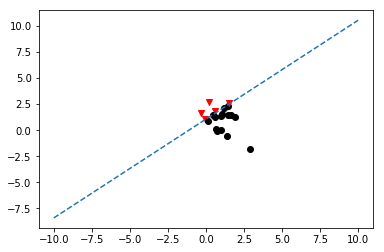

[-12.417122    13.10830479]


In [61]:
import numpy as np
import matplotlib.pyplot as plt


def plot_line(x_val, y_val, targets, points):
    fig = plt.figure()
    for i in range(points.shape[0]):
        if targets[i] == 1.0:
            plt.scatter(points[i, 0], points[i, 1], figure=fig, marker="v", c="red")
        else:
            plt.scatter(points[i, 0], points[i, 1], figure=fig, marker="o", c="black")
    plt.plot(x_val, y_val, "--", figure=fig)
    plt.show()


def activation(net_value, activation_function):
    if activation_function == 'Sigmoid':
        # =============================
        # Calculate Sigmoid Activation
        # =============================
        activation = 1.0 / (1 + np.exp(-net_value))

    elif activation_function == "Linear":
        # =============================
        # Calculate Linear Activation
        # =============================
        activation = net_value

    elif activation_function == "Symmetrical Hard limit":
        # =============================================
        # Calculate Symmetrical Hard limit Activation
        # =============================================
        if net_value.size > 1:
            activation = net_value
            activation[activation >= 0] = 1.0
            activation[activation < 0] = -1.0
        # =============================================
        # If net value is single number
        # =============================================
        elif net_value.size == 1:
            if net_value < 0:
                activation = -1.0
            else:
                activation = 1.0

    elif activation_function == "Hyperbolic Tangent":
        # =============================================
        # Calculate Hyperbolic Tangent Activation
        # =============================================
        activation = ((np.exp(net_value)) - (np.exp(-net_value))) / ((np.exp(net_value)) + (np.exp(-net_value)))

    return activation


a = 1
b = 1


def target(x):
    if x[1] > a*x[0]+b:
        return 1
    else:
        return -1


def gen_y(X_sim):
    return np.array([target(x) for x in X_sim])


def train(data_points, targets, weights):
    outer_loop = False
    error_array = np.zeros_like(targets) + 0.5
    bias = 0

    # ==========================
    # Training starts from here
    # ==========================
    for i in range(0, 1000):
        for j in range(0, data_points.shape[0]):
            # =======================
            # Getting the input point
            # =======================
            point = data_points[j, :]

            # =======================
            # Calculating net value
            # =======================
            net_value = np.sum(weights * point) + bias  # [1x2] * [2x1]

            # =======================
            # Calculating error
            # =======================
            error = targets[j] - activation(net_value, "Symmetrical Hard limit")
            error_array[j] = error

            # ============================================
            # Keeping the error in range from -700 to 700
            # this is to avoid nan or overflow error
            # ============================================
            if error > 1000 or error < -700:
                error /= 10000

            # ==========================
            # Updating Weights and bias
            # ==========================
            weights += error * point
            bias += error * 1.0  # While updating bias input is always 1

            ###########################################################
            # If you want to use unsupervised hebb rule then use the below update rule
            # weights += targets[j] * point
            # bias += targets[j] * 1.0  # While updating bias input is always 1
            ###########################################################
            # if error_array.all() == np.zeros_like(error_array).all():
            #     outer_loop = True
            #     break
        x_values = np.linspace(-10, 10, 256)

        if weights[0] == 0:
            weights[0] = 0.1

        if weights[1] == 0:
            weights[1] = 0.1

        # ========================================================
        # Getting the y values to plot a linear decision boundary
        # ========================================================
        y_values = ((- weights[0] * x_values) - bias) / weights[1]  # Equation of a line

        if outer_loop:
            break

    plot_line(x_values, y_values, targets, data_points)


def pcp(X, y):
    w = np.zeros(2)
    Z = np.hstack((X, np.array([y]).T))
    X = Z[0:, 0:2]
    Y = Z[0:, 2]
    train(X, Y, w)
    # while ~all(z[2]*np.dot(w, z[:2]) > 0 for z in Z):  # some training sample is miss-classified
    #     i = np.where(y*np.dot(w, x) < 0 for x in X)[0][0]  # update the weight based on misclassified sample
    #     print(i)
    #     w = w + y[i]*X[i]
    return w


if __name__ == '__main__':
    X = np.random.multivariate_normal([1, 1], np.diag([1, 1]), 20)
    y = gen_y(X)
    w = pcp(X, y)
    print(w)